# Assignment # 7 : Compare Linear Regression Models.
## Data Science 350
In this assignment I am analysing three linear regression models, wherein I am trying to predict the price of an autombile based on the features provided in the dataset. My goal here is to see evaluate and compare these models on their statistics and in the process also create plots to visually demonstrate the working of the model.
* Following libraries have been added for this assignment.
    - dplyr
    - repr
    - MASS
    - glmnet
* At the start a linear model is created using **lm** function to predict the normalised price with all the features available in the data.
    - Here are key statistics from this model. As you can see the model is **just too perfect(i.e overfitted)** with a *Residual standard error* of 0.2174 and *Adjusted R-Squared* of 0.9527. One reason for it being too perfect is the high number of coefficients(We have used all the features(# 23) in creating this model).
            Residual standard error: 0.2174 on 138 degrees of freedom
            Multiple R-squared:      0.9664,	Adjusted R-squared: 0.9527 
            F-statistic: 70.82 on 56 and 138 DF,  p-value: < 2.2e-16
    - Plot between residuals and fitted values is a normalized straight line with a value near zero.
    - 6 observations have not been included in the model due to 3 singular coefficients.
* On applying **STEP WISE REGRESSION** algorithm to this linear model we would see step wise removal of features based on lowest value of AIC.
    - Following features have been removed as they do not have a major affect on the model.
        - engine.location
        - fuel.type
        - drive.wheels
        - num.of.doors
        - city.mpg
        - horsepower
    - Following features are now used to create the model.
        - make, aspiration, body.style, wheel.base, length, width, height, curb.weight, engine.type, num.of.cylinders,  engine.size, fuel.system, bore, stroke, compression.ratio, peak.rpm, highway.mpg.
    - Here are key statistics from this model. You can see out of a total of 23 features, 6 features have been removed as part of STEPS wise regression, we still have a very fitted model, however we are now using **25 % fewer features**.
            Residual standard error: 0.2137 on 144 degrees of freedom
            Multiple R-squared:      0.9661,	Adjusted R-squared: 0.9543 
            F-statistic: 82.05 on 50 and 144 DF,  p-value: < 2.2e-16
    - Plot between residuals and fitted values is a normalized straight line with a value near zero, all the plots as expected are very similar to the initial liner model.
* Applying **Singular Value Decomposition** algorithm on the dataset leads to following findings.
    - This data frame consists of number of catgegorical variables,in order to work with a model matrix we first need to convert these categorical variables into binary indicator variables.
    - Key Statistics are as follows. Our goal in this model was to minimize the SSR, a value of 8.08 would be considered a low number, an adjusted R2 of 0.9574 is on similar lines with *STEPWISE Regression & Inital Model*
        - SSE = 185.919264474275 
        - SSR = 8.08073552572465 
        - SST = 194 
        - RMSE = 0.963312251162048 
        - Adjusted R^2 = 0.957469813022502 
    - *SVD* would still be preferable as in *STEPWISE* once a feature is deleted, its out of consideration for good.
* Applying **Elastic Net Regression** on the dataset leads to following conditions.
    - Here are key statistics from this model, we are using weighted combination of L1 & L2 regularization, i.e we are trying to apply both ridge and lasso algorithms. In this assignment I have used glmnet to apply system provided lambda 20 times.
        - SSE = 187.455254067312 
        - SSR = 6.54474593268768 
        - SST = 194 
        - RMSE = 0.971270746462758 
        - Adjusted R^2 = 0.965553968775328 
    -
* All three regression alogrithms have returned almost identical adjusted R2 value which at a high level can be construed as a good indicator for model effectiveness. Between all three **<span style="color:red">Elastic Net Regression would be considered the most effective algorithm</span>** with its highest adjusted R2.

## Function Description
In this part of the function I am clearing all the objects, console, loading the the data from the csv file supplied in the assignment. In this process I am also removing any columns and rows with missing values.

In [40]:
rm(list=ls())
# Clear Console:
cat("\014")
library(dplyr)
library(repr)
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, 
                         stringsAsFactors = FALSE)
  
  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)
  
  ## Remove columns or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}

## Load and cleanse the file.
Here I am using triplot function from LearnBayes package to visualize following observations.
* Remove first two columns of symboling & normalized.losses.

In [41]:
# Load and cleanse the csv file.
auto.price = read.auto()
#Remove first two columns of auto.price$symboling & auto.price$normalized.losses
auto.price[1:2] <- list(NULL)

Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"

## Normalize the price data used for modelling.
* I am using Z-score normalization to scale the data.
* This new column is then added to the data frame using the mutate function of dplyr package.

In [42]:
#z-Score Normalization of price data
mean_price <- mean(auto.price$price)
sd_price <- sd(auto.price$price)
normalized_zprice <- (auto.price$price - mean_price) / sd_price

#Add normalized price to the data frame.
auto.price = mutate(auto.price,normalized_zprice = normalized_zprice)
dim(auto.price)
str(auto.price)

[1] 195  25

'data.frame':	195 obs. of  25 variables:
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.of.cylinders : chr  "four" "four" "six" "four" ...
 $ engine.size      : int  130 130 152 109 136 136

## Compute a linear model with all features.
* I am using standard lm function from base stats package to create a model.
* My formula is based on all the features of the data frame, I have taken care to remove *Price* from the formula and I am now computing on *Normalized Price* calculated in the previous step.


Call:
lm(formula = normalized_zprice ~ . - price, data = auto.price)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4360 -0.1137  0.0000  0.0999  1.0426 

Coefficients: (3 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -3.505e+00  2.171e+00  -1.615 0.108672    
makeaudi                1.538e-02  2.780e-01   0.055 0.955960    
makebmw                 6.324e-01  2.894e-01   2.185 0.030554 *  
makechevrolet          -6.631e-01  2.839e-01  -2.336 0.020945 *  
makedodge              -7.509e-01  2.332e-01  -3.220 0.001598 ** 
makehonda              -3.871e-01  2.740e-01  -1.413 0.160029    
makeisuzu              -4.822e-01  3.072e-01  -1.570 0.118760    
makejaguar             -1.852e-01  3.476e-01  -0.533 0.595036    
makemazda              -3.512e-01  2.121e-01  -1.655 0.100107    
makemercedes-benz       1.877e-01  3.122e-01   0.601 0.548599    
makemercury            -5.642e-01  3.662e-01  -1.541 0

Warning message:
"not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119"

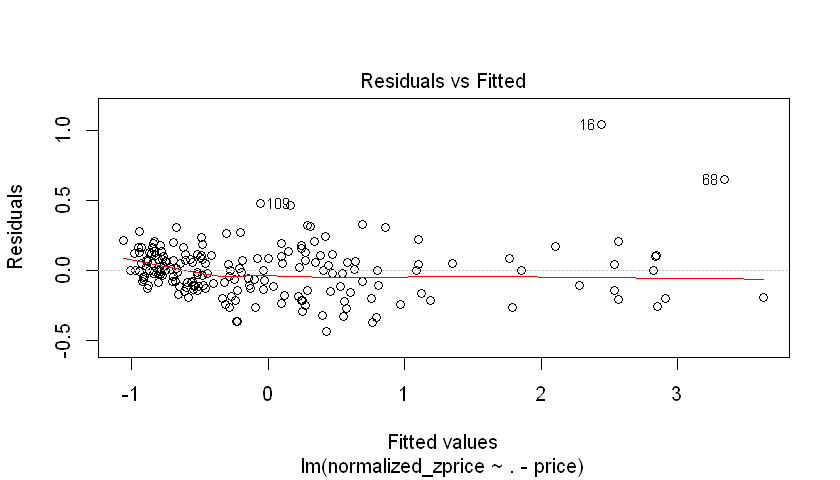

Warning message:
"not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119"

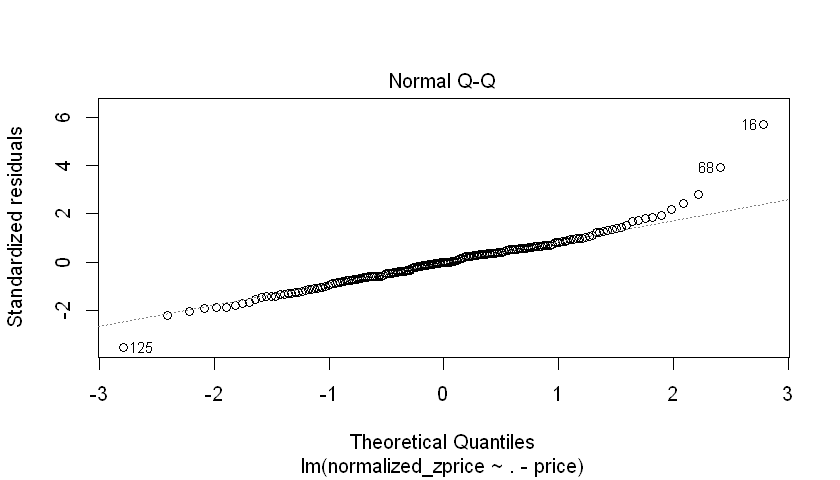

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

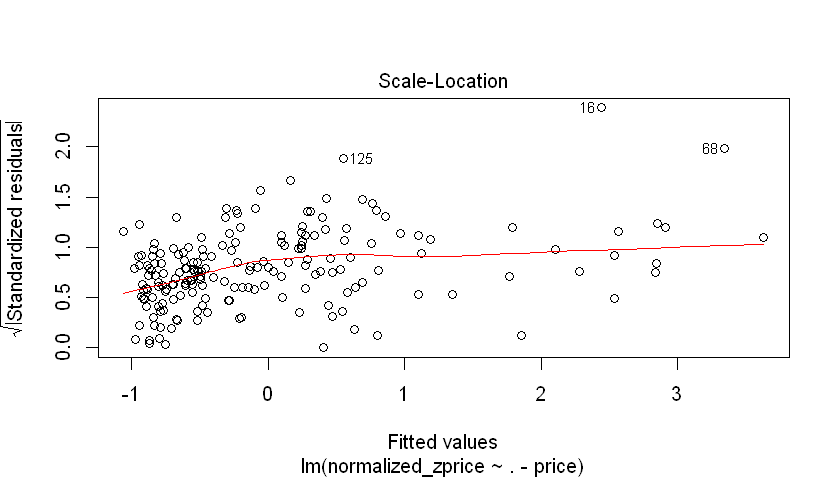

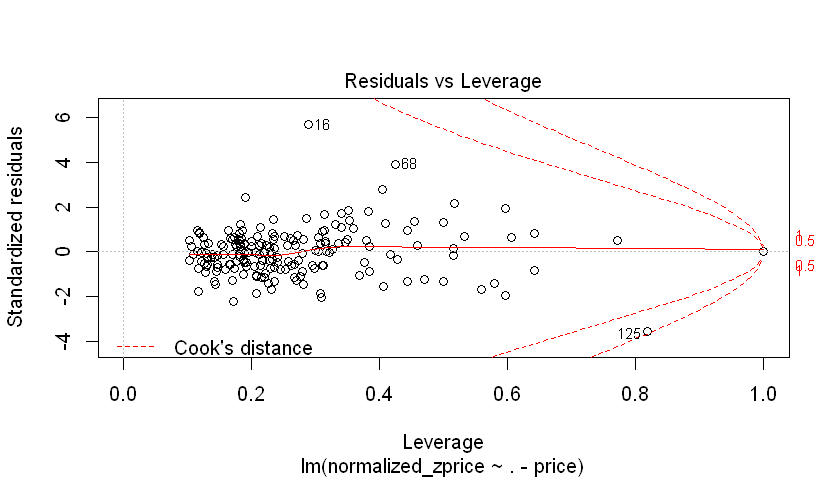

In [43]:
#Compute a model with all features.
# Removing price from the formula.
lm.auto.price = lm(normalized_zprice ~ . -price, data = auto.price)
summary(lm.auto.price)
plot(lm.auto.price)

## Apply STEPWISE REGRESSION.
* We would now see step wise removal of features based on lowest value of AIC.
* Following features have been removed as they do not have a major affect on the model.
        - engine.location
        - fuel.type
        - drive.wheels
        - num.of.doors
        - city.mpg
        - horsepower
* Following features are now used to create the model.
        - make
        - aspiration
        - body.style
        - wheel.base
        - length
        - width
        - height
        - curb.weight
        - engine.type
        - num.of.cylinders
        - engine.size
        - fuel.system
        - bore, stroke
        - compression.ratio
        - peak.rpm
        - highway.mpg

Start:  AIC=-548.52
normalized_zprice ~ (make + fuel.type + aspiration + num.of.doors + 
    body.style + drive.wheels + engine.location + wheel.base + 
    length + width + height + curb.weight + engine.type + num.of.cylinders + 
    engine.size + fuel.system + bore + stroke + compression.ratio + 
    horsepower + peak.rpm + city.mpg + highway.mpg + price) - 
    price


Step:  AIC=-548.52
normalized_zprice ~ make + fuel.type + aspiration + num.of.doors + 
    body.style + drive.wheels + wheel.base + length + width + 
    height + curb.weight + engine.type + num.of.cylinders + engine.size + 
    fuel.system + bore + stroke + compression.ratio + horsepower + 
    peak.rpm + city.mpg + highway.mpg


Step:  AIC=-548.52
normalized_zprice ~ make + aspiration + num.of.doors + body.style + 
    drive.wheels + wheel.base + length + width + height + curb.weight + 
    engine.type + num.of.cylinders + engine.size + fuel.system + 
    bore + stroke + compression.ratio + horsepower + peak.rpm + 


Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,138,6.523878,-548.5185
- engine.location,0,1.598721e-14,138,6.523878,-548.5185
- fuel.type,0,1.421085e-14,138,6.523878,-548.5185
- drive.wheels,2,2.147641e-02,140,6.545355,-551.8776
- num.of.doors,2,2.232056e-02,142,6.567675,-555.2137
- city.mpg,1,9.933198e-04,143,6.568669,-557.1842
- horsepower,1,1.014854e-02,144,6.578817,-558.8832



Call:
lm(formula = normalized_zprice ~ make + aspiration + body.style + 
    wheel.base + length + width + height + curb.weight + engine.type + 
    num.of.cylinders + engine.size + fuel.system + bore + stroke + 
    compression.ratio + peak.rpm + highway.mpg, data = auto.price)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42933 -0.12687  0.00000  0.09525  1.02266 

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -5.099e+00  1.817e+00  -2.805 0.005721 ** 
makeaudi                1.098e-02  2.639e-01   0.042 0.966868    
makebmw                 6.292e-01  2.783e-01   2.261 0.025281 *  
makechevrolet          -6.817e-01  2.639e-01  -2.583 0.010790 *  
makedodge              -7.916e-01  2.204e-01  -3.591 0.000450 ***
makehonda              -4.245e-01  2.562e-01  -1.657 0.099770 .  
makeisuzu              -4.993e-01  2.918e-01  -1.711 0.089258 .  
makejaguar             -2.910e-

Warning message:
"not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119"

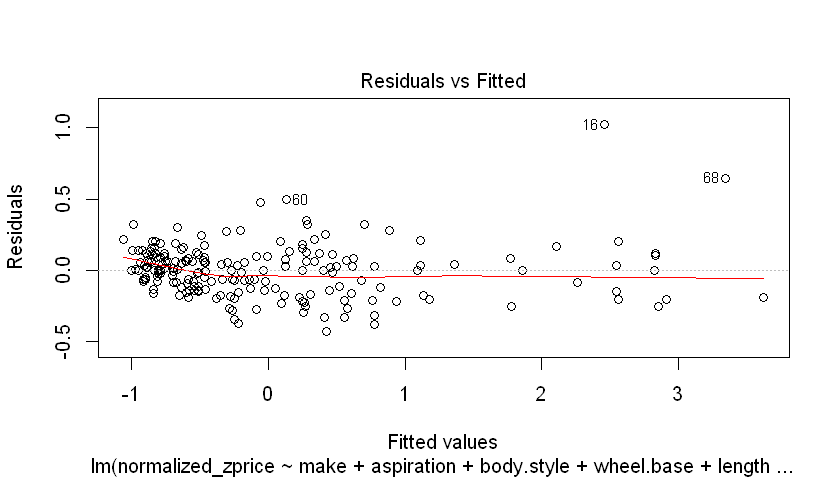

Warning message:
"not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119"

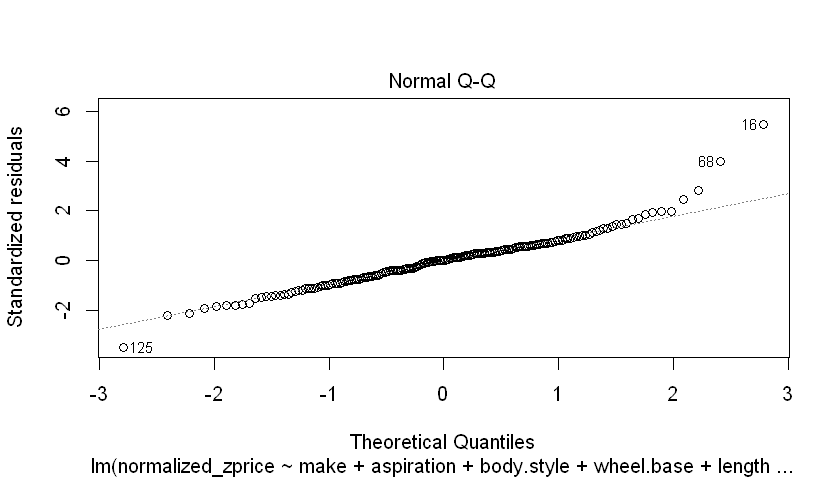

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

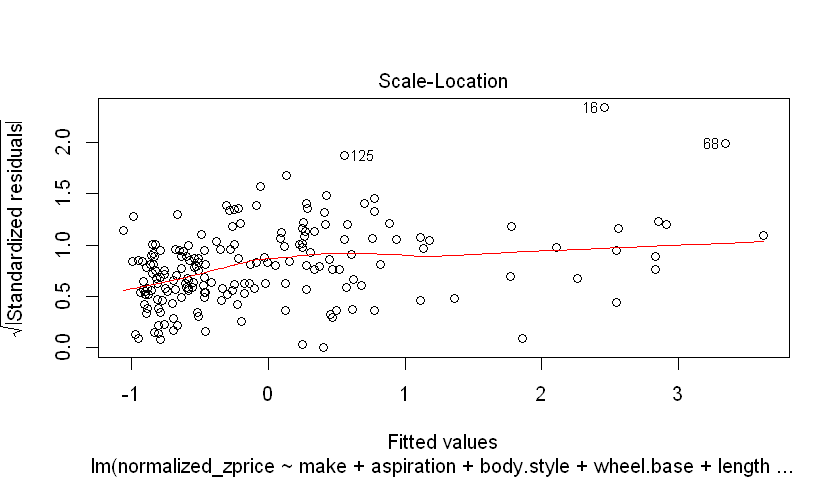

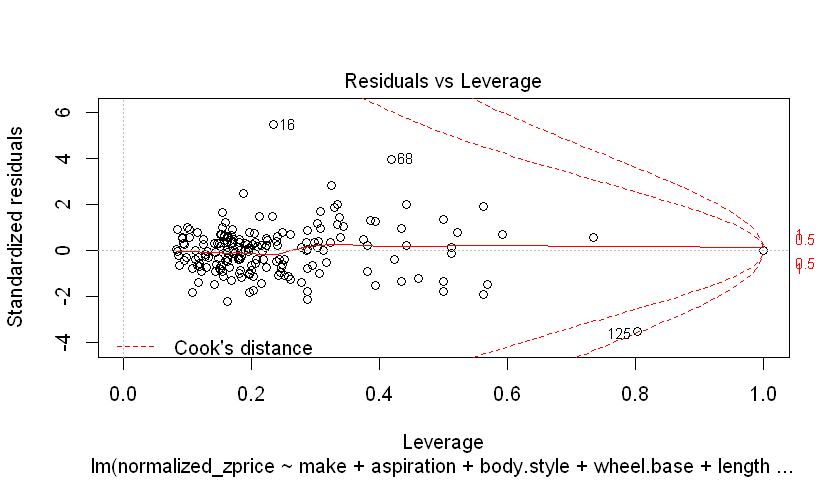

In [44]:
#Apply Stepwise Regression
library(MASS)
lm.step = stepAIC(lm.auto.price, direction = 'both')
lm.step$anova # ANOVA of the result 
summary(lm.step) # Summary of the best model
plot(lm.step)

## Applying Singular Value Decomposition using Pseudo Inverse.
* This data frame consists of number of catgegorical variables,in order to work with a model matrix we first need to convert these categorical variables into binary indicator variables.
* Remove price from the formula.
* Remove intercept.

,makeaudi,makebmw,makechevrolet,makedodge,makehonda,makeisuzu,makejaguar,makemazda,makemercedes-benz,makemercury,...,fuel.systemmpfi,fuel.systemspdi,fuel.systemspfi,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,3.47,2.68,9.0,111,5000,21,27
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,3.47,2.68,9.0,111,5000,21,27
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2.68,3.47,9.0,154,5000,19,26
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,3.19,3.40,10.0,102,5500,24,30
5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,3.19,3.40,8.0,115,5500,18,22
6,1,0,0,0,0,0,0,0,0,0,...,1,0,0,3.19,3.40,8.5,110,5500,19,25


,makeaudi,makebmw,makechevrolet,makedodge,makehonda,makeisuzu,makejaguar,makemazda,makemercedes-benz,makemercury,...,fuel.systemmpfi,fuel.systemspdi,fuel.systemspfi,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg
makeaudi,6,0,0,0,0,0,0,0,0,0,...,6,0,0,19.08,20.40,51.80,687,33000,116,147
makebmw,0,8,0,0,0,0,0,0,0,0,...,8,0,0,27.79,25.34,68.60,1111,40550,155,203
makechevrolet,0,0,3,0,0,0,0,0,0,0,...,0,0,0,8.97,9.25,28.70,188,15900,123,139
makedodge,0,0,0,9,0,0,0,0,0,0,...,2,0,0,27.85,30.29,77.71,777,48500,252,307
makehonda,0,0,0,0,13,0,0,0,0,0,...,1,0,0,39.28,45.01,119.80,1043,74800,395,461
makeisuzu,0,0,0,0,0,2,0,0,0,0,...,0,0,1,6.74,6.46,17.70,168,9800,48,58


[1] 59 59

[1] 6.396831e+09 6.224584e+07 2.009663e+05 5.116133e+04 1.800131e+04
 [6] 5.983738e+03 1.496713e+03 1.059193e+03 5.611327e+02 3.892267e+02
[11] 1.844496e+02 8.874336e+01 6.414157e+01 4.845008e+01 3.704636e+01
[16] 3.423271e+01 3.061394e+01 2.167061e+01 1.994314e+01 1.903848e+01
[21] 1.689278e+01 1.525455e+01 1.207887e+01 1.184923e+01 1.046442e+01
[26] 9.468944e+00 8.554216e+00 8.106297e+00 7.600509e+00 6.928972e+00
[31] 6.437897e+00 4.833468e+00 4.168010e+00 3.819149e+00 3.372276e+00
[36] 3.164960e+00 2.620415e+00 2.293321e+00 1.790938e+00 1.603663e+00
[41] 1.368211e+00 1.270825e+00 1.168893e+00 1.029788e+00 8.960178e-01
[46] 8.475651e-01 7.099960e-01 6.638200e-01 4.439080e-01 4.183108e-01
[51] 3.840634e-01 2.992129e-01 1.880952e-01 1.161175e-01 6.755221e-02
[56] 4.837816e-02 5.778489e-03 6.391699e-07 6.391699e-07

Compute and print the inverse singular value matrix

1.563274e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.00000e+00,0.0000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.000000e+00,1.606533e-08,0.000000e+00,0.000000e+00,0.00000e+00,0.0000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.000000e+00,0.000000e+00,4.975959e-06,0.000000e+00,0.00000e+00,0.0000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.000000e+00,0.000000e+00,0.000000e+00,1.954601e-05,0.00000e+00,0.0000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.55515e-05,0.0000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000e+00,0.0001671196,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Compute and print the pseudo inverse

0.279009094,0.032017061,-0.02922976,-0.03810027,-0.02569104,-0.001187728,-0.090038601,-0.0203608381,-0.01552567,0.00927926,...,-0.0225217956,0.03831815,-0.009204268,-0.010706491,0.018733338,-0.003381626,4.911627e-04,9.978607e-06,0.002844382,0.002026201
0.032017061,0.259330680,-0.10456679,-0.03680758,-0.02587653,-0.008521736,0.058356130,-0.0005464458,0.05075683,-0.13977579,...,-0.0109490016,0.00592013,0.022319587,0.020514408,0.054653369,0.002390788,7.709612e-04,-7.000648e-06,0.001335415,-0.001085043
-0.029229757,-0.104566791,0.38563204,-0.03421768,-0.03739297,-0.060221614,0.001449259,-0.0285536972,-0.01922845,0.06939692,...,-0.0091269267,-0.02884411,-0.054290945,-0.058561544,-0.006622536,0.002554062,-1.181299e-03,2.121791e-05,-0.010136378,0.001693106
-0.038100267,-0.036807583,-0.03421768,0.15045412,0.02517432,-0.019346258,0.002658671,-0.0119456083,-0.02700146,0.05689494,...,0.0001142092,0.04863690,-0.019829139,0.032393755,-0.028632695,0.001295138,1.832868e-04,-2.231820e-05,0.003897572,-0.002799459
-0.025691045,-0.025876529,-0.03739297,0.02517432,0.14464281,-0.012879046,-0.002948240,-0.0171578773,-0.02489916,0.07933525,...,0.0372169109,0.03795064,-0.029423326,0.059538385,-0.024175048,0.004283138,-5.753411e-05,-2.387047e-05,-0.002066584,0.001979289
-0.001187728,-0.008521736,-0.06022161,-0.01934626,-0.01287905,0.267916768,-0.036324019,-0.0006795460,0.00828184,-0.01062345,...,0.0147305168,-0.01928053,0.179197966,0.002938958,0.003371301,0.002737700,3.097166e-04,8.897565e-06,-0.001865580,0.001497249


Compute and print the dimensions of the matrix MInvM

1,2,3,4,5,6,7,8,9,10,...,186,187,188,189,190,191,192,193,194,195
0.015960098,0.015960098,0.023319818,0.24276961,0.129834903,0.110885432,0.095718728,0.105967413,0.111210472,0.00451494,...,-0.001567908,-0.006007487,0.001786216,-0.003584590,0.004527701,0.004131228,0.019399757,0.004119518,-0.004180435,-0.004660092
-0.001203162,-0.001203162,-0.004152711,0.04099443,-0.012529405,-0.026870384,-0.013988373,0.007227189,0.017362066,0.18118645,...,-0.011056919,-0.021935665,-0.009146492,0.015672041,0.028820596,-0.003198867,0.018016489,-0.028006802,-0.053862606,-0.015042962
0.019913427,0.019913427,0.052496052,0.02742170,-0.038556391,-0.008701956,0.007040355,-0.002216524,-0.011617643,-0.03532790,...,-0.009108152,-0.015514996,-0.019570038,-0.012298664,-0.016557148,-0.024168255,-0.035974855,-0.016087210,0.053356533,0.022303105
0.030897202,0.030897202,0.004462538,-0.04493100,0.012743152,-0.009254610,0.001586518,-0.020331702,-0.021327417,-0.01563491,...,0.006320512,0.025997730,0.010049885,-0.005745864,-0.021798833,-0.001588940,-0.030375421,0.015148738,-0.014702007,-0.040633288
0.024850933,0.024850933,-0.016770161,-0.04051842,-0.008451225,-0.012088065,-0.009070222,-0.013744882,-0.006919607,-0.01692692,...,-0.010346398,-0.005259175,-0.012583039,0.002525091,-0.004905059,-0.008401290,0.006804126,0.015504408,-0.013360746,0.009890468
-0.037773987,-0.037773987,-0.024034100,0.01844441,-0.018509371,0.008969123,-0.004945537,0.009963194,0.010677317,-0.02737243,...,-0.011396038,-0.025921950,-0.013330188,-0.004264504,0.008284401,-0.011852801,0.015336061,-0.015778879,0.010621362,0.004229700


[1]  59 195

[1] 59  1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


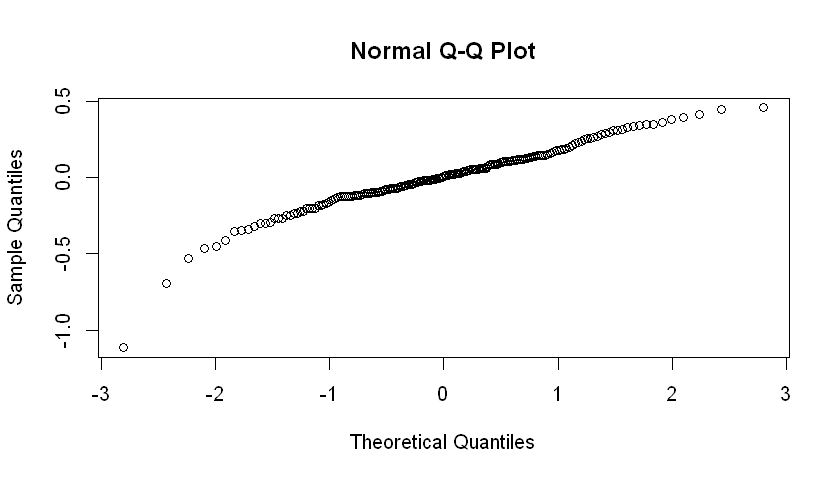

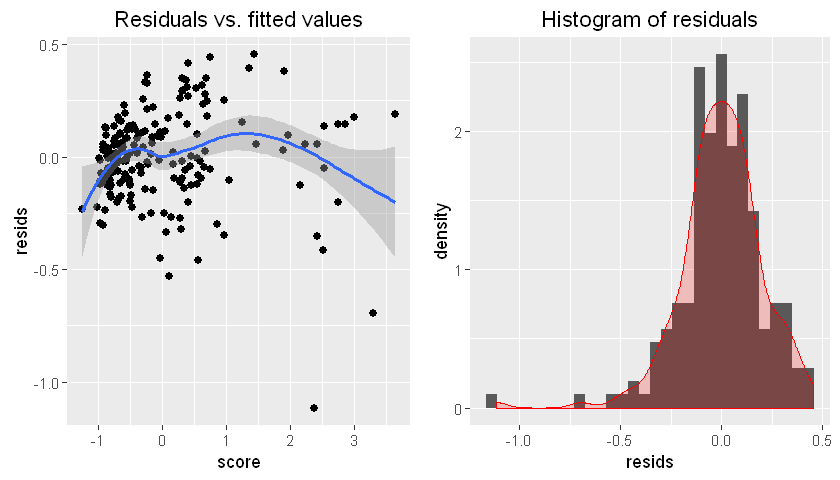

SSE = 185.919264474275 
SSR = 8.08073552572465 
SST = 194 
RMSE = 0.963312251162048 
Adjusted R^2 = 0.957469813022502 


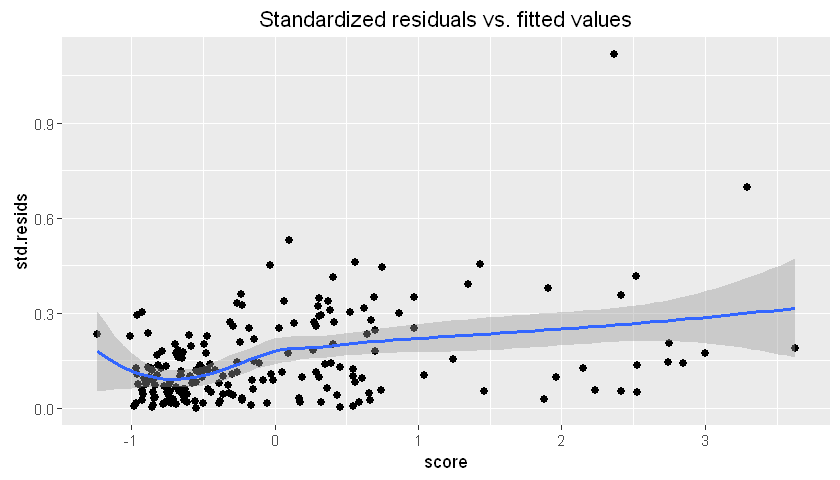

In [45]:
# Apply Singular Value Decomposition using Pseudo Inverse.
# This data frame consists of number of catgegorical variables,in order to work with a model matrix we first need to convert these categorical 
#variables into binary indicator variables.
mod.mat = model.matrix(normalized_zprice ~ . -price, data = auto.price)
# Remove intercept
mod_withoutintercept.mat <- mod.mat[1:195,-1]
M = as.matrix(mod_withoutintercept.mat)
head(M)
MTM = t(M) %*% M
head(MTM)
dim(MTM)
#compute the SVD of model matrix M (195 * 60)
# Examine the singular values and in the process check for "Rank Deficiency".
mSVD <- svd(MTM)
#Validate whether singular vectors are orthogonal.
uOrth <- t(mSVD$u) %*% mSVD$u
vOrth <- mSVD$v %*% t(mSVD$v)
uOrthSingLeftVector <- mSVD$u
vOrthSingRightVector <- mSVD$v
diagSDV <- mSVD$d
diagSDV
#By looking at singlular values we can now deduce that this matrix is rank deficient with 15 values (45 - 59) below zero.
# Let us now compute the pseudo inverse of MTM matrix.
cat('Compute and print the inverse singular value matrix')
d.trim = rep(0, 59)
d.trim[1:44] =1/ mSVD$d[1:44]
mD = diag(d.trim)
head(mD)
cat('Compute and print the pseudo inverse')
mInv = mSVD$v %*% mD %*% t(mSVD$u)
head(mInv)
cat('Compute and print the dimensions of the matrix MInvM')
MInvM = mInv %*% t(M)
head(MInvM)
dim(MInvM)

# Compute the vector of model coefficients by multiplying MInvM with normalized auto price.
b <- MInvM %*% auto.price$normalized_zprice
dim(b)

# Now we can evaluate the model using this vector of model coefficient.
auto.price$score = M %*% b + mean(auto.price$normalized_zprice)
auto.price$resids = auto.price$score - auto.price$normalized_zprice

require(repr)
options(repr.pmales.extlot.width=8, repr.plot.height=4)

plot.svd.reg <- function(df, k = 4){
  require(ggplot2)
  require(gridExtra)
  
  p1 <- ggplot(df) + 
    geom_point(aes(score, resids), size = 2) + 
    stat_smooth(aes(score, resids)) +
    ggtitle('Residuals vs. fitted values')
  
  p2 <- ggplot(df, aes(resids)) +
    geom_histogram(aes(y = ..density..)) +
    geom_density(color = 'red', fill = 'red', alpha = 0.2) +
    ggtitle('Histogram of residuals')
  
  qqnorm(df$resids)
  
  grid.arrange(p1, p2, ncol = 2)
  
  df$std.resids = sqrt((df$resids - mean(df$resids))^2)  
  
   p3 = ggplot(df) + 
    geom_point(aes(score, std.resids), size = 2) + 
    stat_smooth(aes(score, std.resids)) +
    ggtitle('Standardized residuals vs. fitted values')
  print(p3) 
  
  n = nrow(df)
  Ybar = mean(df$normalized_zprice)
  SST <- sum((df$normalized_zprice - Ybar)^2)
  SSR <- sum(df$resids * df$resids)
  SSE = SST - SSR
  cat(paste('SSE =', as.character(SSE), '\n'))
  cat(paste('SSR =', as.character(SSR), '\n'))
  cat(paste('SST =', as.character(SSE + SSR), '\n'))
  cat(paste('RMSE =', as.character(SSE/(n - 2)), '\n'))
  
  adjR2  <- 1.0 - (SSR/SST) * ((n - 1)/(n - k - 1))
  cat(paste('Adjusted R^2 =', as.character(adjR2)), '\n')
}

plot.svd.reg(auto.price)

## Elastic Net Regression
* Herein we are giving equal weight to L1(Lasso) and L2(Euclidean) regulairization.

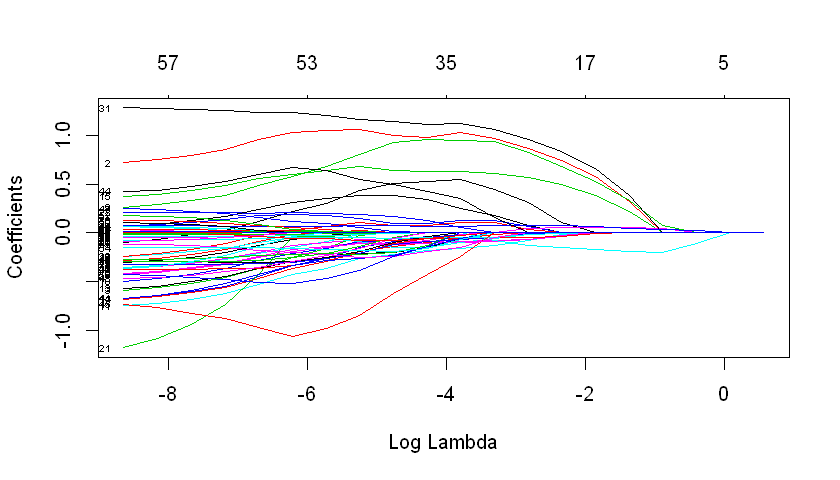

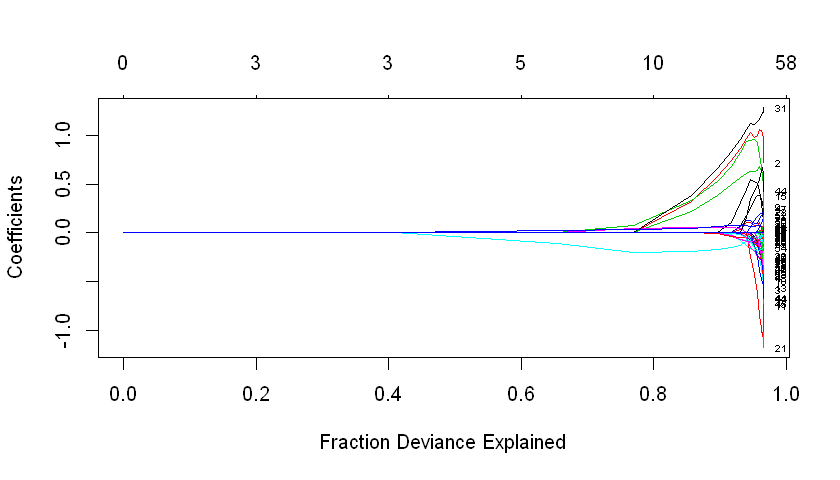

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


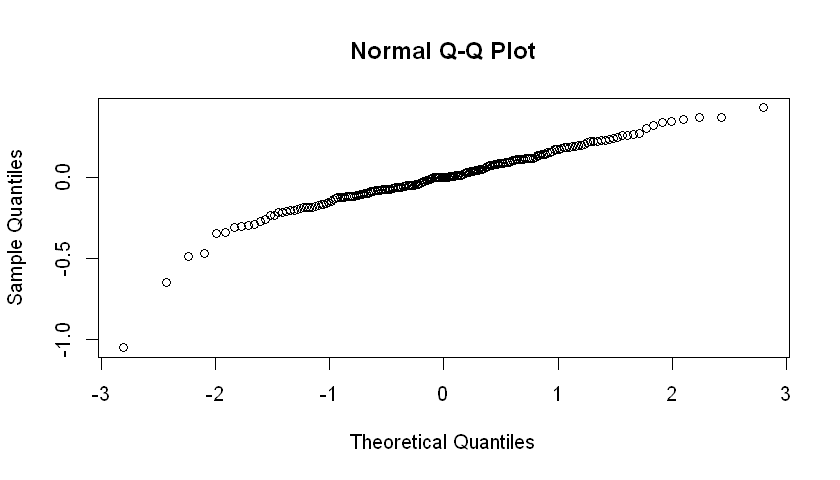

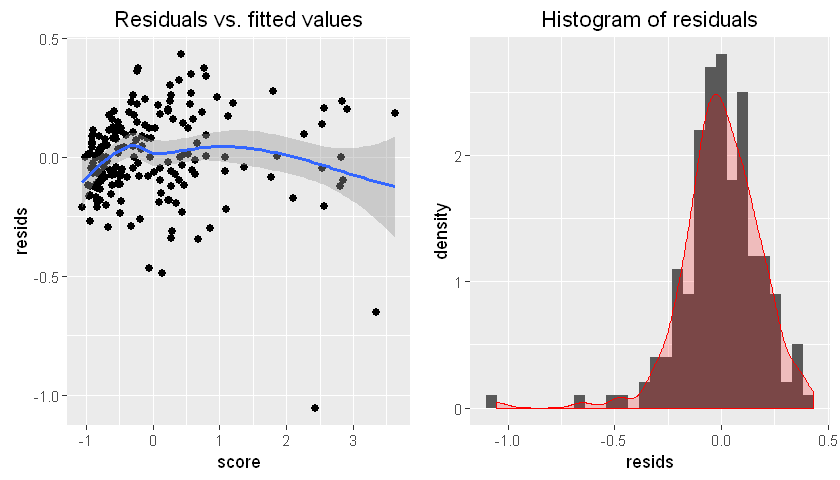

SSE = 187.455254067312 
SSR = 6.54474593268768 
SST = 194 
RMSE = 0.971270746462758 
Adjusted R^2 = 0.965553968775328 


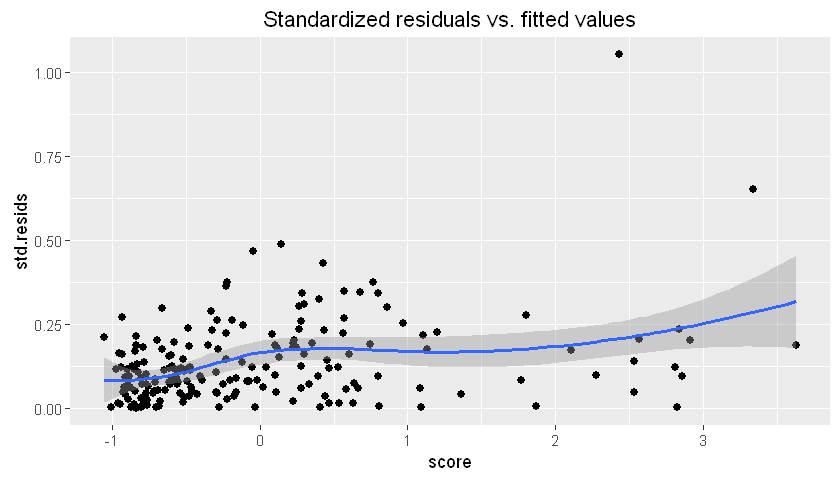

In [46]:
#Elastic Net Regression.
require(glmnet)
b = as.matrix(auto.price$normalized_zprice)
mod.ridge = glmnet(M, b, family = 'gaussian', nlambda = 20, alpha = .5)
plot(mod.ridge, xvar = 'lambda', label = TRUE)
plot(mod.ridge, xvar = 'dev', label = TRUE)

#Let us now evaluate the model created by elastice net regression by calculating the score using predict function.

auto.price$score = predict(mod.ridge, newx = M)[, 20]
auto.price$resids = auto.price$score - auto.price$normalized_zprice

plot.svd.reg(auto.price)